# Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

### Load Dataset

In [3]:
data = pd.read_csv('train.csv')

### Analyzing the Data

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90


In [5]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
5995,FDB32,20.600,Low Fat,0.023586,Fruits and Vegetables,94.7778,OUT017,2007,NaN,Tier 2,Supermarket Type1,7.18
5996,FDJ16,9.195,Low Fat,0.115064,Frozen Foods,58.6246,OUT049,1999,Medium,Tier 1,Supermarket Type1,6.77
5997,FDJ32,10.695,Low Fat,0.057910,Fruits and Vegetables,60.4536,OUT045,2002,NaN,Tier 2,Supermarket Type1,5.21
5998,FDO12,15.750,Low Fat,0.054920,Baking Goods,195.8452,OUT035,2004,Small,Tier 2,Supermarket Type1,8.50
5999,NCB18,19.600,Low Fat,0.041291,Household,86.9514,OUT046,1997,Small,Tier 1,Supermarket Type1,7.26


In [6]:
data.shape

(6000, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6000 non-null   object 
 1   X2      4994 non-null   float64
 2   X3      6000 non-null   object 
 3   X4      6000 non-null   float64
 4   X5      6000 non-null   object 
 5   X6      6000 non-null   float64
 6   X7      6000 non-null   object 
 7   X8      6000 non-null   int64  
 8   X9      4289 non-null   object 
 9   X10     6000 non-null   object 
 10  X11     6000 non-null   object 
 11  Y       6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


### Check for Duplication

In [8]:
data.nunique()

X1     1553
X2      410
X3        5
X4     5577
X5       16
X6     4634
X7       10
X8        9
X9        3
X10       3
X11       4
Y       508
dtype: int64

### Check for Categorical Variables

In [9]:
print(data.X3.unique())     # Need to be standardized
print(data.X5.unique())
print(data.X7.unique())
print(data.X8.unique())
print(data.X9.unique())
print(data.X10.unique())
print(data.X11.unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### Missing Values Calculation

In [10]:
data.isnull().sum()

X1        0
X2     1006
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9     1711
X10       0
X11       0
Y         0
dtype: int64

### Statistics Summary

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X2,4994.0,12.956536,4.658851,4.555,8.89500,12.80000,17.100000,21.350000
X4,6000.0,0.066333,0.051492,0.000,0.02703,0.05462,0.095154,0.328391
X6,6000.0,141.228200,62.540569,31.290,94.03765,143.19700,186.522050,266.888400
X8,6000.0,1997.840333,8.334412,1985.000,1987.00000,1999.00000,2004.000000,2009.000000
Y,6000.0,7.303403,1.014361,3.510,6.75000,7.50000,8.040000,9.400000


In [12]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X1,6000,1553,FDP28,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,4994.0,NaN,NaN,NaN,12.956536,4.658851,4.555,8.895,12.8,17.1,21.35
X3,6000,5,Low Fat,3595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,6000.0,NaN,NaN,NaN,0.066333,0.051492,0.0,0.02703,0.05462,0.095154,0.328391
X5,6000,16,Fruits and Vegetables,875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,6000.0,NaN,NaN,NaN,141.2282,62.540569,31.29,94.03765,143.197,186.52205,266.8884
X7,6000,10,OUT045,677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8,6000.0,NaN,NaN,NaN,1997.840333,8.334412,1985.0,1987.0,1999.0,2004.0,2009.0
X9,4289,3,Medium,1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X10,6000,3,Tier 3,2358,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

### Univariate Analysis

Histograms & Box Plots for Numerical Features

Histogram & Box plot for X2


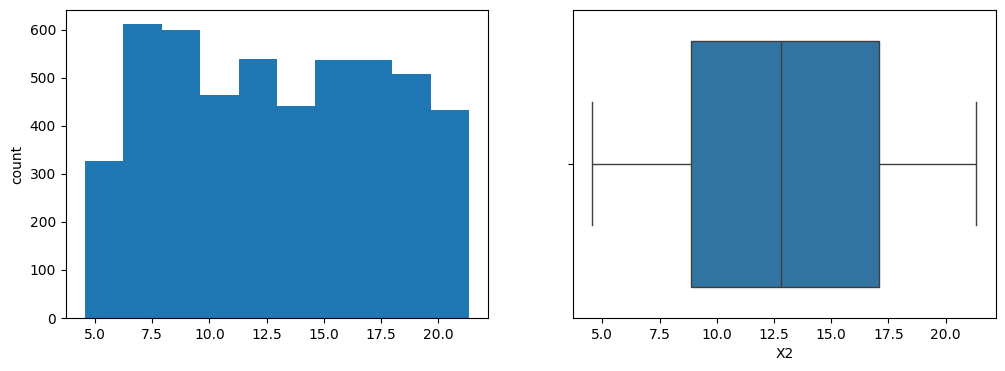

Histogram & Box plot for X4


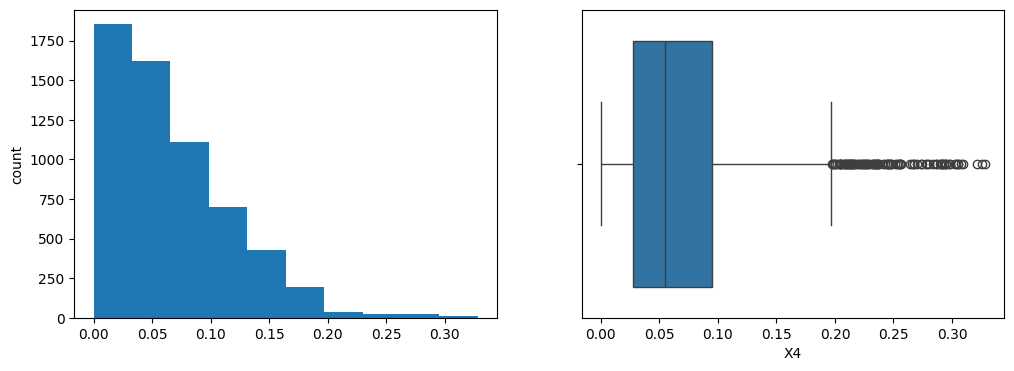

Histogram & Box plot for X6


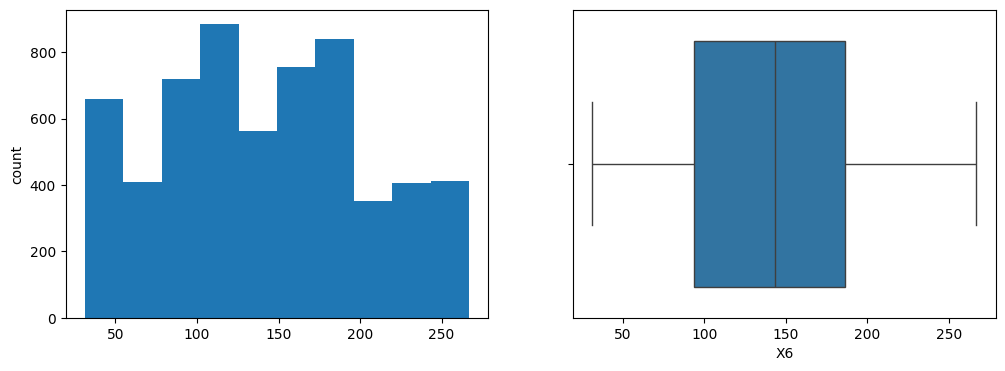

Histogram & Box plot for X8


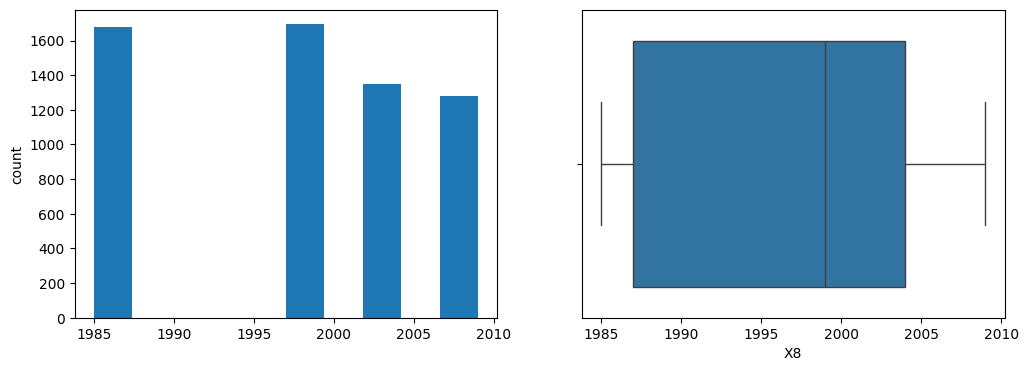

In [15]:
for col in ['X2', 'X4', 'X6', 'X8']:
    print(f"Histogram & Box plot for {col}")
    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Count Plot for Categorical Features

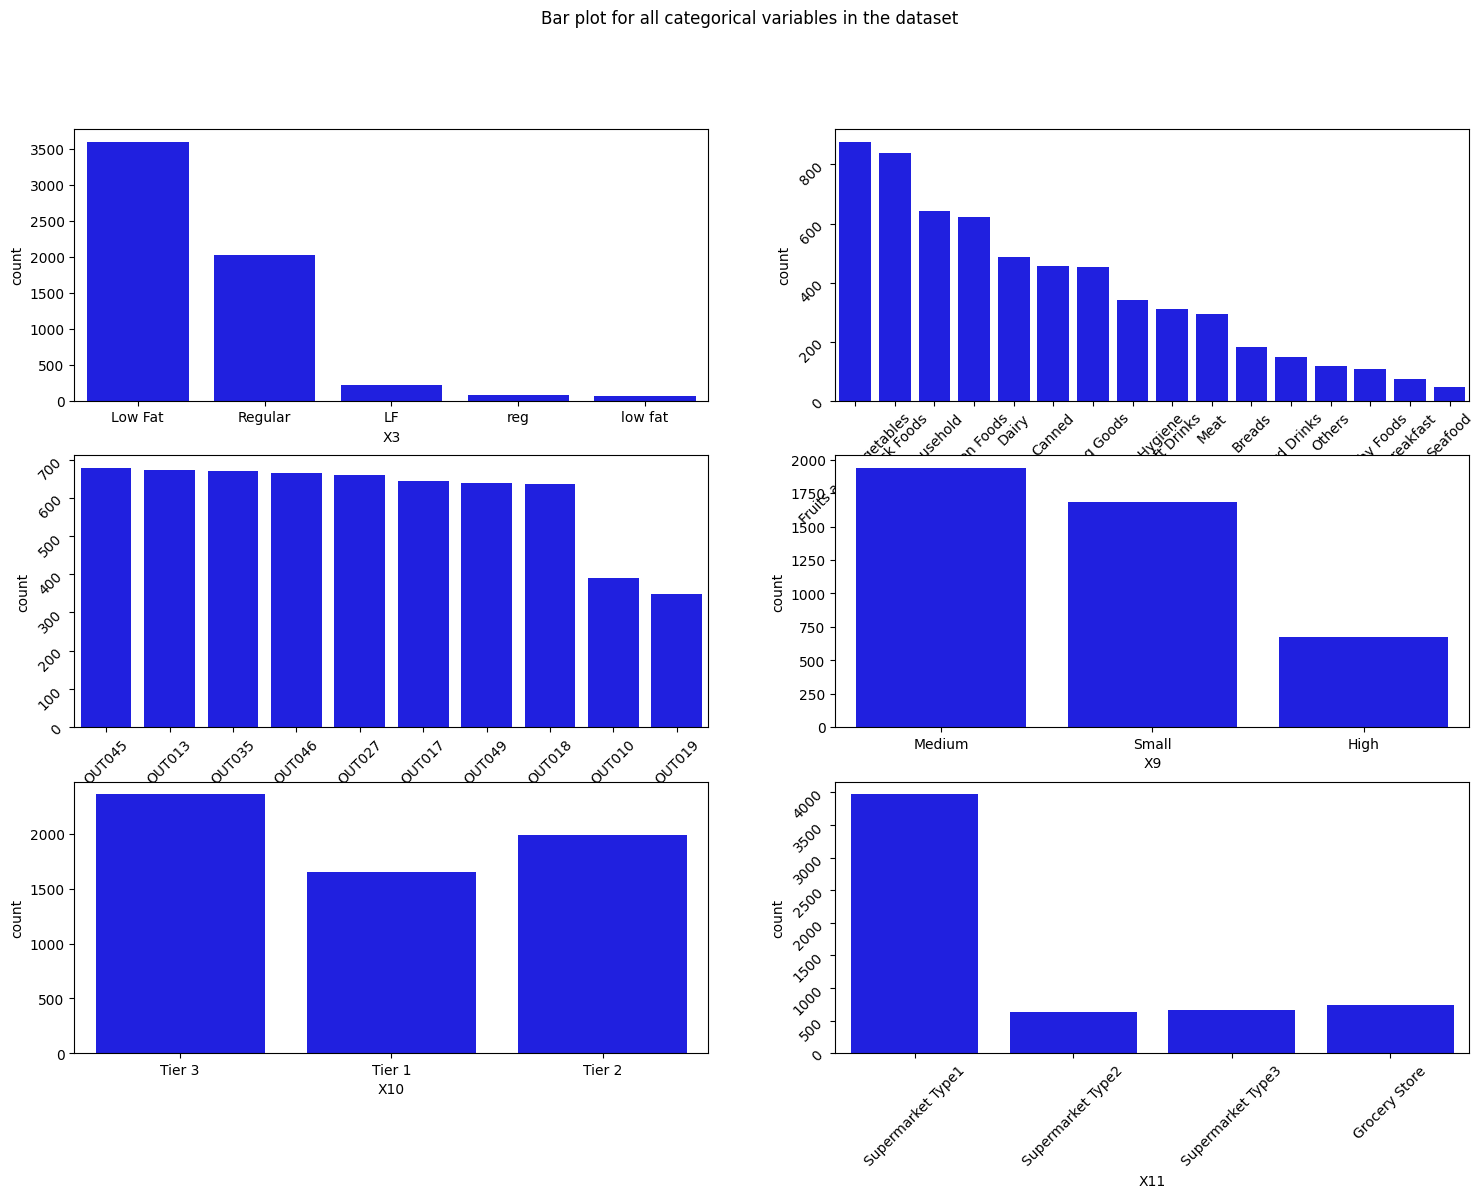

In [25]:
# for col in ['X3', 'X5', 'X7', 'X9', 'X10', 'X11']:
fig, axes = plt.subplots(3, 2, figsize = (18, 12))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'X3', data = data, color = 'blue', 
              order = data['X3'].value_counts().index)
sns.countplot(ax = axes[0, 1], x = 'X5', data = data, color = 'blue', 
              order = data['X5'].value_counts().index)
sns.countplot(ax = axes[1, 0], x = 'X7', data = data, color = 'blue', 
              order = data['X7'].value_counts().index)
sns.countplot(ax = axes[1, 1], x = 'X9', data = data, color = 'blue', 
              order = data['X9'].value_counts().index)
sns.countplot(ax = axes[2, 0], x = 'X10', data = data, color = 'blue', 
              order = data['X10'].head(20).value_counts().index)
sns.countplot(ax = axes[2, 1], x = 'X11', data = data, color = 'blue', 
              order = data['X11'].head(20).value_counts().index)
axes[1][0].tick_params(labelrotation=45)
axes[0][1].tick_params(labelrotation=45)
axes[2][1].tick_params(labelrotation=45)

### Bivariate Analysis

Pair Plot between Continuous Variables

<Figure size 1300x1700 with 0 Axes>

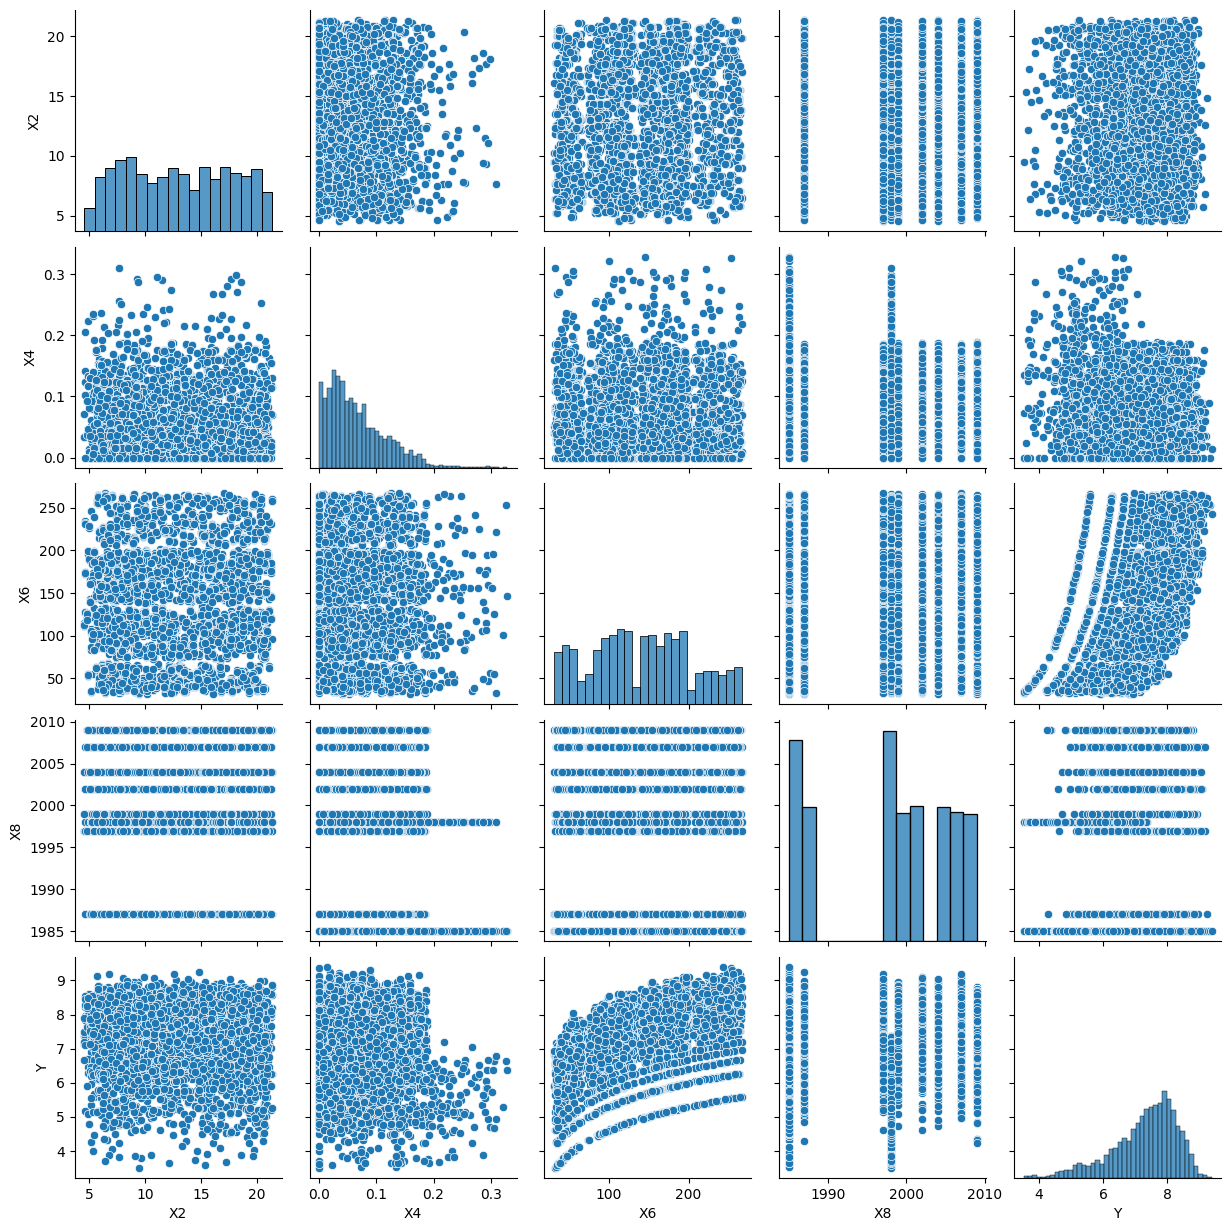

In [29]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data)
plt.show()

Bar Plot between Categorical Variables and Target

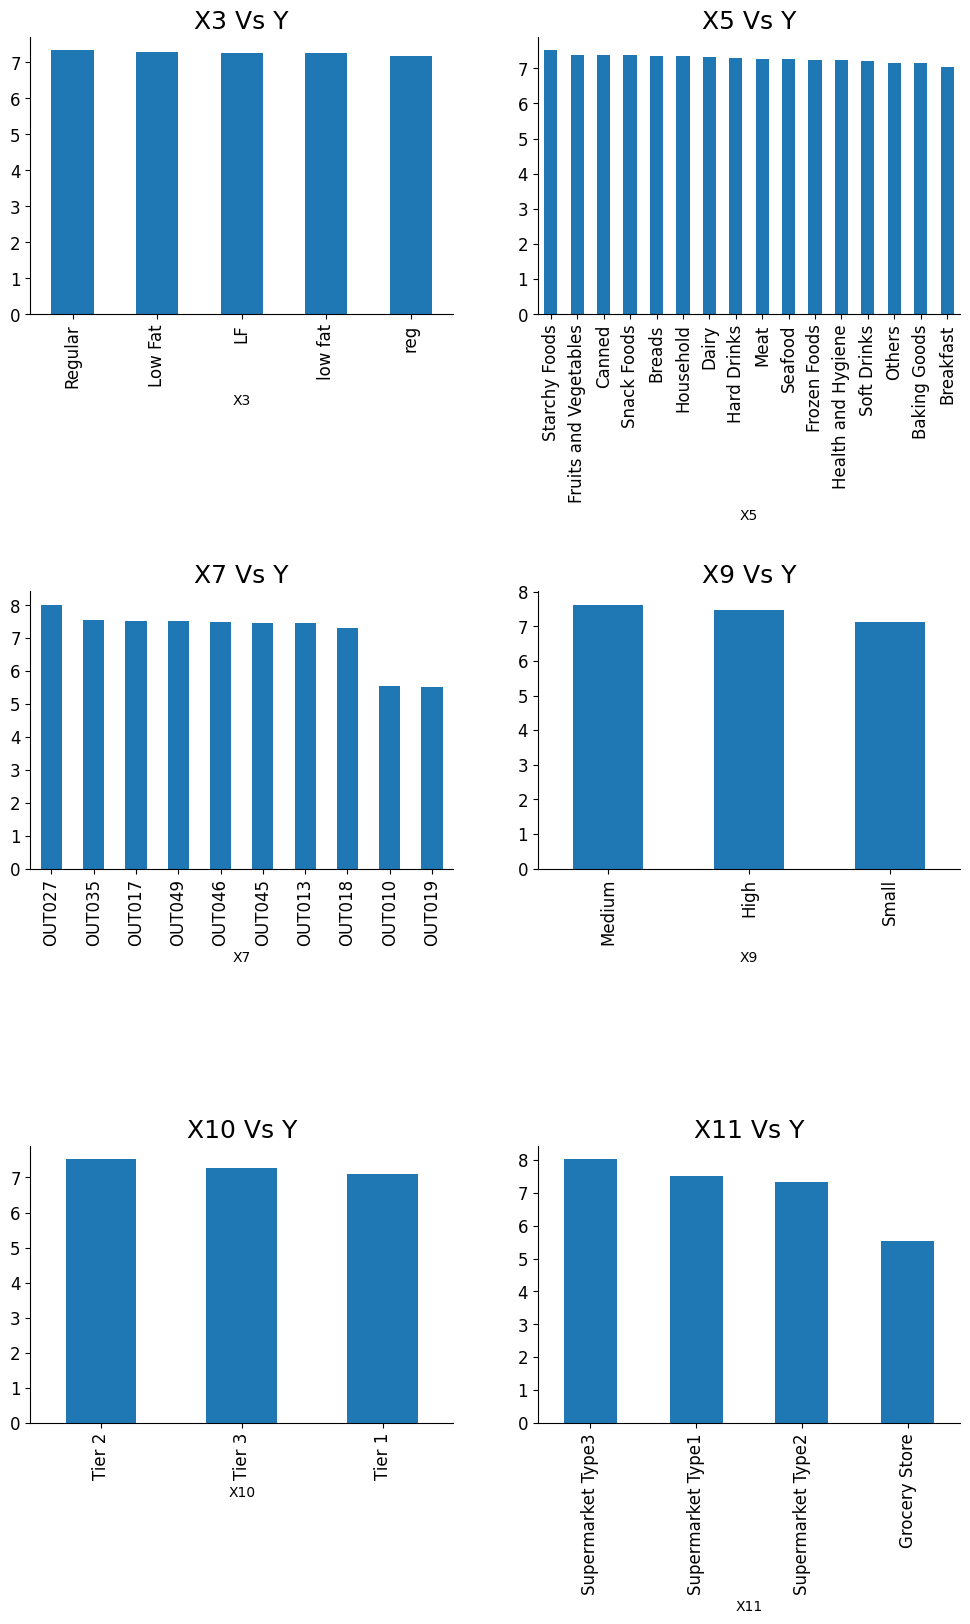

In [33]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
data.groupby('X3')['Y'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("X3 Vs Y", fontsize=18)
data.groupby('X5')['Y'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("X5 Vs Y", fontsize=18)
data.groupby('X7')['Y'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("X7 Vs Y", fontsize=18)
data.groupby('X9')['Y'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("X9 Vs Y", fontsize=18)
data.groupby('X10')['Y'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("X10 Vs Y", fontsize=18)
data.groupby('X11')['Y'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("X11 Vs Y", fontsize=18)
plt.subplots_adjust(hspace=1)
sns.despine()

### Multivariate Analysis

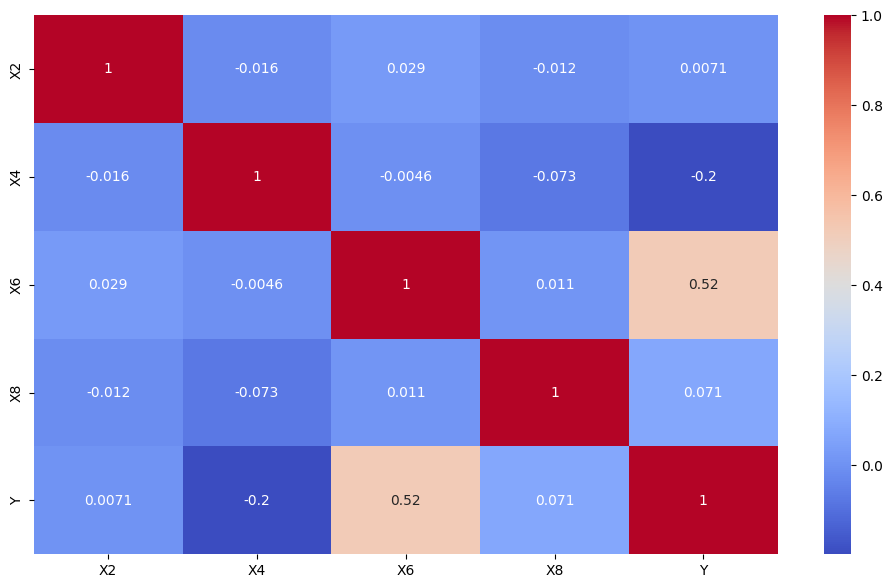

In [36]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(numeric_only=True), annot = True, cmap='coolwarm')
plt.show()